In [15]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Load the dataset from the Excel file
df = pd.read_excel('Folds5x2_pp.xlsx')

# Display the first 5 rows to make sure it loaded correctly
print("Data loaded successfully! Here are the first 5 rows:")
print(df.head())

# Get a quick summary of the dataset
print("\nHere's a summary of the dataset:")
df.info()

Data loaded successfully! Here are the first 5 rows:
      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

Here's a summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# Make sure you've already run the cell that imports pandas
# and loads the data into 'df'

# 1. Generate descriptive statistics
# This gives you the count, mean, standard deviation, min/max, etc., for each column.
print("--- Descriptive Statistics ---")
print(df.describe())

# 2. Create a correlation matrix
# This shows how strongly each variable is related to every other variable.
# It's the most important step for your project's story.
print("\n--- Correlation Matrix ---")
print(df.corr())

--- Descriptive Statistics ---
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000
/n--- Correlation Matrix ---
          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.

In [19]:
# Import the necessary functions from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# --- 1. Separate features (X) and target (y) ---
# X contains all the input columns (AT, V, AP, RH)
X = df[['AT', 'V', 'AP', 'RH']]

# y contains the single output column we want to predict (PE)
y = df['PE']


# --- 2. Split data into training and testing sets ---
# 80% of the data will be for training, 20% for testing.
# random_state=42 ensures you get the same split every time you run it.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 3. Create and train the model ---
# We're creating a Random Forest model.
# n_estimators=100 is the number of "trees" in the forest. It's a good default.
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Teach the model using our training data
model.fit(X_train, y_train)


# --- 4. Evaluate the model ---
# Make predictions on the test data (the data the model has never seen)
predictions = model.predict(X_test)

# Calculate the R-squared score to see how accurate the model is
r2 = r2_score(y_test, predictions)

print(f"Model training complete!")
print(f"The R-squared score of our model is: {r2:.4f}")

Model training complete!
The R-squared score of our model is: 0.9637


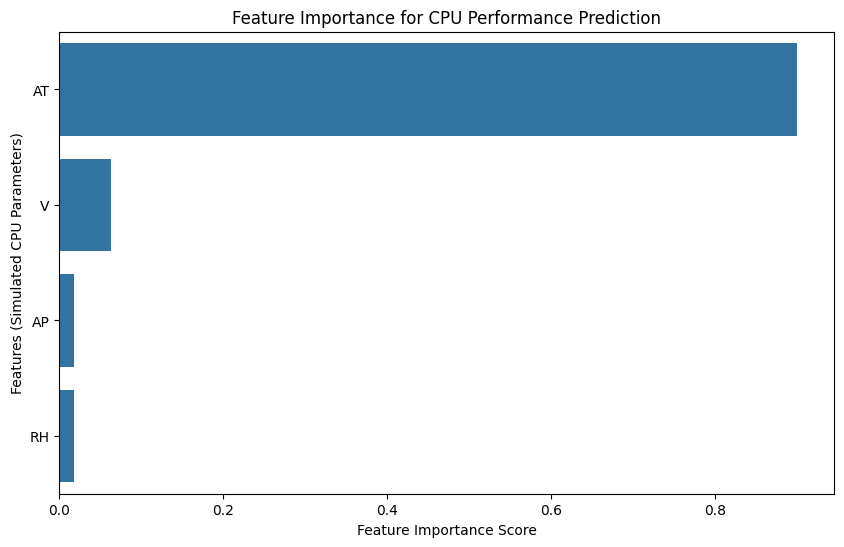

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the importance of each feature from our trained model
feature_importances = model.feature_importances_

# Create a pandas Series to make it easier to plot
# We'll use the column names from our X dataframe as the index
features = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance for a cleaner plot
features = features.sort_values(ascending=False)

# --- Create the plot ---
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=features.index)

# Add labels and a title
plt.xlabel('Feature Importance Score')
plt.ylabel('Features (Simulated CPU Parameters)')
plt.title('Feature Importance for CPU Performance Prediction')
plt.show()